In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter



In [2]:
df = pd.read_csv('who_suicide_statistics.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [3]:
df.head(15)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [4]:
df.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [5]:
df["suicides_no"] = df["suicides_no"].fillna(0)

In [6]:
df.count()

country        43776
year           43776
sex            43776
age            43776
suicides_no    43776
population     38316
dtype: int64

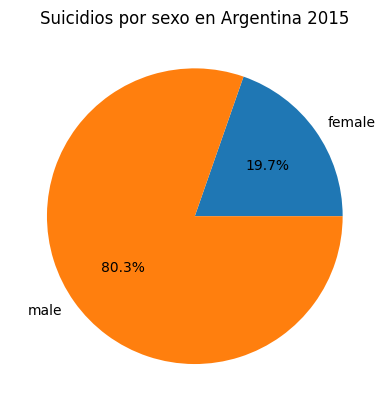

In [7]:
#Un gráfico circular de un solo año. Esto seria algo bueno
dato_2016 = df[(df['year']==2015) & (df['country']=='Argentina')].groupby('sex')['suicides_no'].sum()

plt.pie(
    dato_2016,                 # valores
    labels=dato_2016.index,    # etiquetas (M/F)
    autopct="%1.1f%%"        # mostrar porcentajes
)
plt.title("Suicidios por sexo en Argentina 2015")
plt.show()


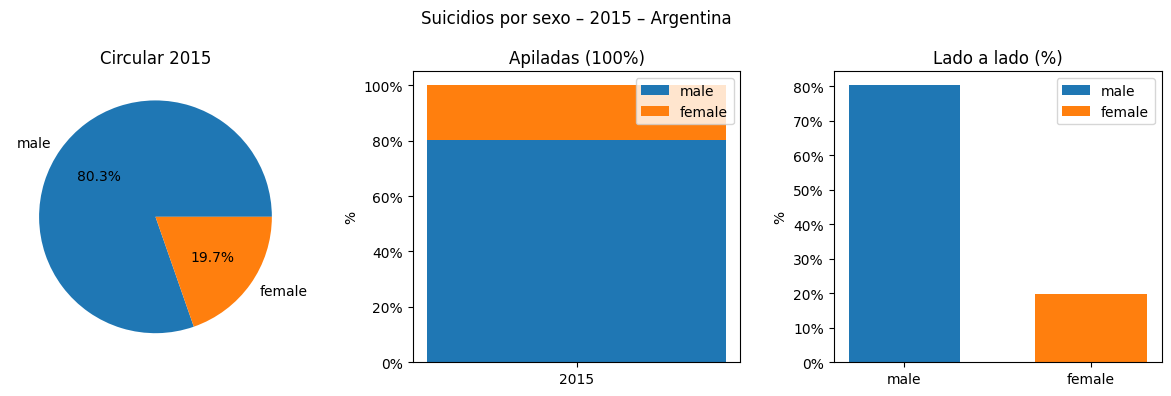

In [8]:
#comparacion, se ve la ventaja de uno sobre otro
anio = 2015
from matplotlib.ticker import PercentFormatter

anio = 2015
serie = (
    df[(df['year']==anio) & (df['country']== 'Argentina')]
    .groupby('sex')['suicides_no'].sum()
    .reindex(['male','female']).fillna(0)
)
total = serie.sum()
p = serie / total  # proporciones

fig, axes = plt.subplots(1, 3, figsize=(12,4))
# Pie (% ya lo muestra autopct)
axes[0].pie(p.values, labels=p.index, autopct='%1.1f%%')
axes[0].set_title(f'Circular {anio}')

# Barras apiladas 100%
axes[1].bar([0], [p['male']], label='male')
axes[1].bar([0], [p['female']], bottom=[p['male']], label='female')
axes[1].set_xticks([0]); axes[1].set_xticklabels([str(anio)])
axes[1].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[1].set_ylabel('%'); axes[1].set_title('Apiladas (100%)'); axes[1].legend()

# Barras lado a lado en %
axes[2].bar([0], [p['male']], width=0.6, label='male')
axes[2].bar([1], [p['female']], width=0.6, label='female')
axes[2].set_xticks([0,1]); axes[2].set_xticklabels(['male','female'])
axes[2].yaxis.set_major_formatter(PercentFormatter(1.0))
axes[2].set_ylabel('%'); axes[2].set_title('Lado a lado (%)'); axes[2].legend()

plt.suptitle(f'Suicidios por sexo – {anio} – Argentina')
plt.tight_layout(); plt.show()


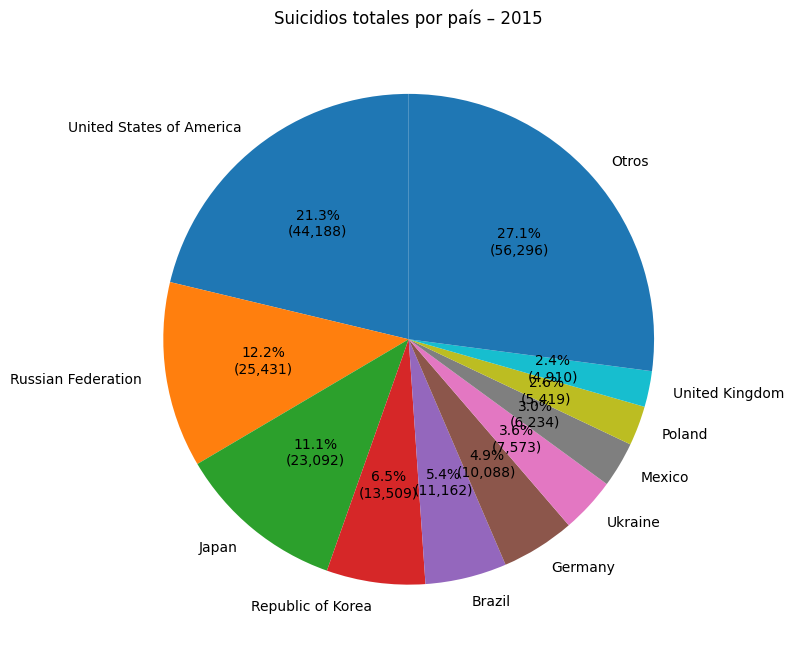

In [13]:


# 2) Tipos y limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y agregar por país
df2015 = df[df["year"] == 2015].copy()
totales = (
    df2015.groupby("country", as_index=True)["suicides_no"]
    .sum()
    .sort_values(ascending=False)
)
totales = totales[totales > 0]  # opcional: quitar países con 0

# 4) Pie chart (top 10 + 'Otros')
top_n = 10
top = totales.head(top_n)
otros = totales.iloc[top_n:].sum()

labels = list(top.index) + (["Otros"] if otros > 0 else [])
sizes = list(top.values) + ([otros] if otros > 0 else [])

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f"{p:.1f}%\n({int(p*sum(sizes)/100):,})",
    startangle=90
)
plt.title("Suicidios totales por país – 2015")
plt.tight_layout()
plt.show()



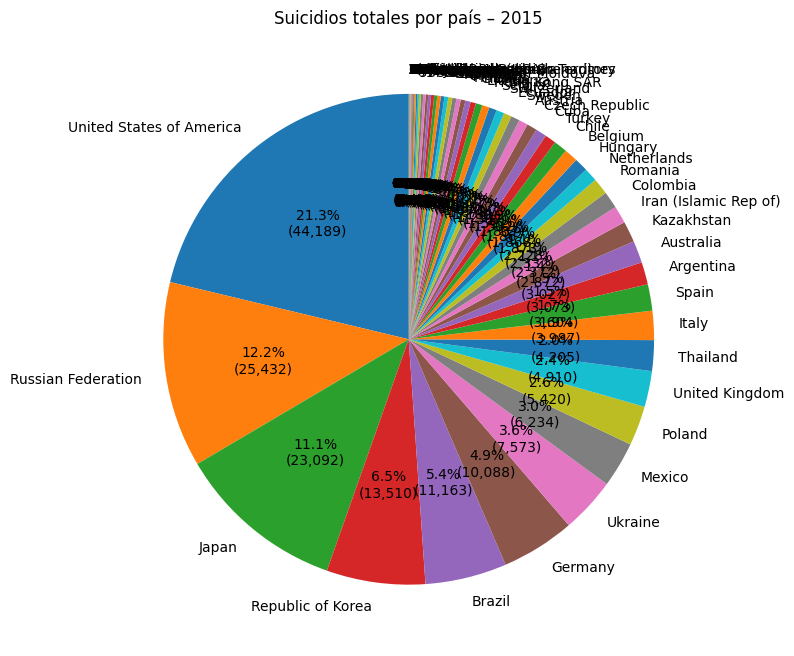

In [14]:
# 2) Tipos y limpieza mínima
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["suicides_no"] = pd.to_numeric(df["suicides_no"], errors="coerce").fillna(0)

# 3) Filtrar 2015 y agregar por país
df2015 = df[df["year"] == 2015].copy()
totales = (
    df2015.groupby("country", as_index=True)["suicides_no"]
    .sum()
    .sort_values(ascending=False)
)
totales = totales[totales > 0]  # opcional: quitar países con 0

# 4) Pie chart (top 10 + 'Otros')
top_n = 10
top = totales.head(top_n)
otros = totales.iloc[top_n:].sum()

labels = totales.index.tolist()
sizes = totales.values.tolist()

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f"{p:.1f}%\n({int(p*sum(sizes)/100):,})",
    startangle=90
)
plt.title("Suicidios totales por país – 2015")
plt.tight_layout()
plt.show()

